In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:

stock_max, stock_min, stock_close, stock_amount = np.loadtxt('Data-and-Output/stock.txt', delimiter='\t', 
                                                                 skiprows=2, usecols=(2, 3, 4, 5), unpack = True)
N = 100 # total observations
stock_close = stock_close[:N]
print (stock_close)

n = 5 # average on 5 days 
weight = np.ones(n)
weight /= weight.sum()
print (weight)
stock_sma = np.convolve(stock_close, weight, mode='valid')  # simple moving average

weight = np.linspace(1, 0, n)
weight = np.exp(weight)
weight /= weight.sum()
print (weight)
stock_ema = np.convolve(stock_close, weight, mode='valid')  # exponential moving average

    

[ 9.91  9.63  9.76  9.76  9.83  9.25  9.34  9.38  9.5   9.56  9.23  9.63
  9.89  9.63  9.76  9.27  9.18  9.13  8.89  8.91  9.29  9.15  9.01  8.89
  9.01  9.17  9.14  9.24  9.17  9.05  9.15  9.79 10.12  9.97  9.76 10.06
 10.34 10.36 10.42 10.66 10.54 10.56 10.31 10.69 11.12 11.   11.04 11.08
 11.12 11.   10.88 11.1  10.79 11.15 11.06 10.99 10.57  9.69  9.68  9.86
  9.47  9.59  9.63  9.42  9.47  9.7   9.47  9.54  8.79  8.5   8.75  8.62
  8.88  9.18  9.    8.56  8.97  8.92  8.71  8.9   9.2   8.85  8.83  8.95
  8.84  8.49  8.42  8.41  8.29  8.27  7.96  7.82  8.47  8.15  8.24  8.26
  8.3   8.75  8.76  8.57]
[0.2 0.2 0.2 0.2 0.2]
[0.31002201 0.24144538 0.18803785 0.14644403 0.11405072]


[-2.93713744e-16  1.36089278e-13 -2.52229123e-11  2.31326570e-09
 -9.74415804e-08  1.64889388e-07  1.46926065e-04 -5.50026534e-03
  8.41219125e-02 -5.82456587e-01  1.10096716e+01]


/home/qshan/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


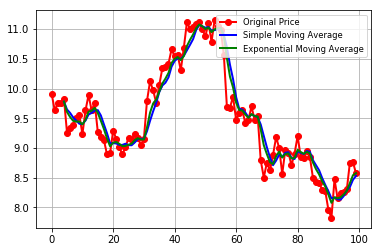

In [9]:
t = np.arange(n-1, N)
poly = np.polyfit(t, stock_ema, 10)
print(poly) # coefficients
stock_ema_hat = np.polyval(poly, t)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.plot(np.arange(N), stock_close, 'ro-', linewidth=2, label=u'Original Price')
t = np.arange(n-1, N)
plt.plot(t, stock_sma, 'b-', linewidth=2, label=u'Simple Moving Average')
plt.plot(t, stock_ema, 'g-', linewidth=2, label=u'Exponential Moving Average')
plt.legend(loc='upper right', fontsize = 'small')
plt.grid(True)
plt.show()



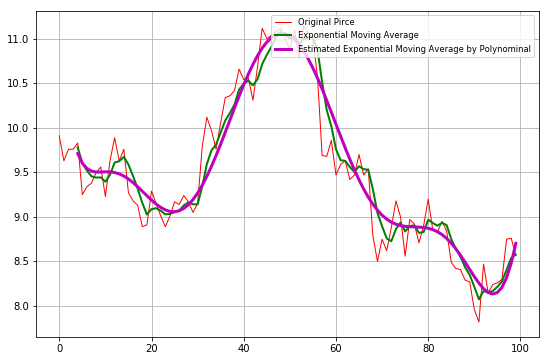

In [10]:

plt.figure(figsize=(9, 6))
plt.plot(np.arange(N), stock_close, 'r-', linewidth=1, label=u'Original Pirce')
plt.plot(t, stock_ema, 'g-', linewidth=2, label=u'Exponential Moving Average')
plt.plot(t, stock_ema_hat, 'm-', linewidth=3, label=u'Estimated Exponential Moving Average by Polynominal')
plt.legend(loc='upper right', fontsize = 'small')
plt.grid(True)
plt.show()

In [11]:
# Convolve on an image 
import numpy as np
import os
from PIL import Image

def convolve(image, weight):
    height, width = image.shape
    h, w = weight.shape
    height_new = height - h + 1
    width_new = width - w + 1
    image_new = np.zeros((height_new, width_new), dtype=np.float)
    for i in range(height_new):
        for j in range(width_new):
            image_new[i,j] = np.sum(image[i:i+h, j:j+w] * weight)
    image_new = image_new.clip(0, 255)
    image_new = np.rint(image_new).astype('uint8')
    return image_new



ModuleNotFoundError: No module named 'PIL'

Gradient Check:
soble_x R


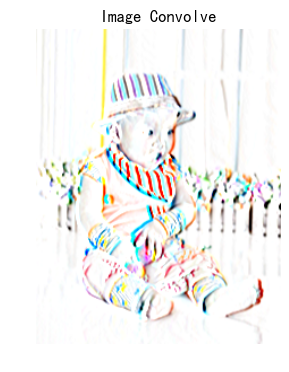

soble_y R


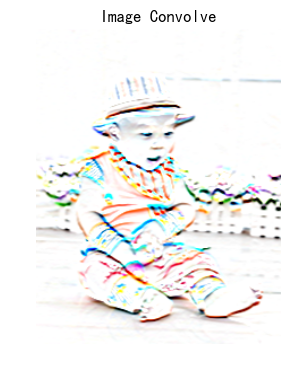

soble R


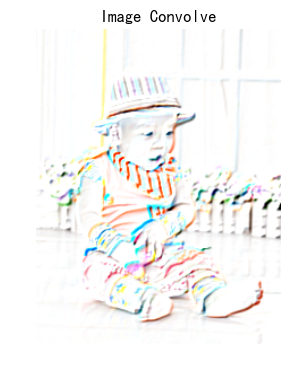

prewitt_x R


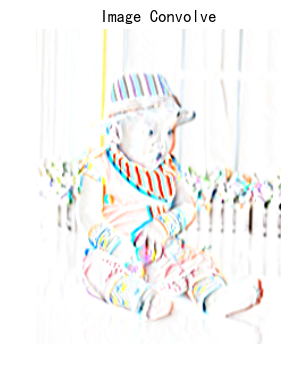

prewitt_y R


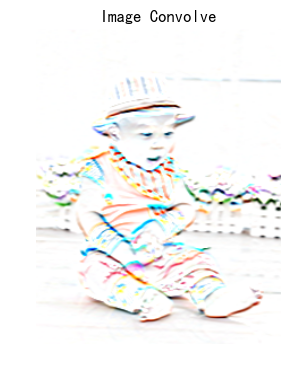

prewitt R


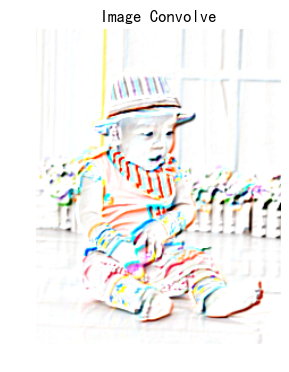

laplacian R


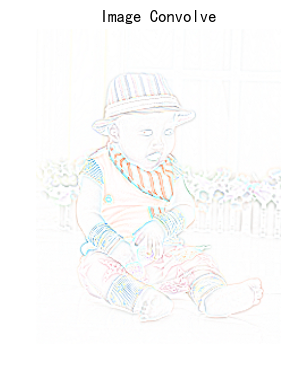

laplacian2 R


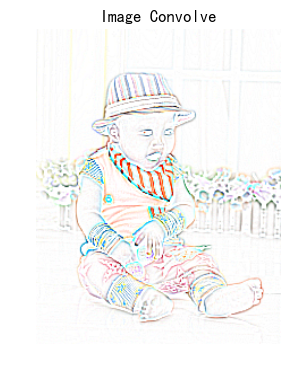

In [49]:
A = Image.open("Data-and-Output/6.son.jpg", 'r')
# output_path = './Pic'
# if not os.path.exists(output_path):
#    os.mkdir(output_path)
a = np.array(A)
soble_x = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
soble_y = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))
soble = np.array(([-1, -1, 0], [-1, 0, 1], [0, 1, 1]))
prewitt_x = np.array(([-1, 0, 1], [-1, 0, 1], [-1, 0, 1]))
prewitt_y = np.array(([-1, -1,-1], [0, 0, 0], [1, 1, 1]))
prewitt = np.array(([-2, -1, 0], [-1, 0, 1], [0, 1, 2]))
laplacian = np.array(([0, -1, 0], [-1, 4, -1], [0, -1, 0]))
laplacian2 = np.array(([-1, -1, -1], [-1, 8, -1], [-1, -1, -1]))
weight_list = ('soble_x', 'soble_y', 'soble', 'prewitt_x', 'prewitt_y', 'prewitt', 'laplacian', 'laplacian2')
print('Gradient Check:')
for weight in weight_list:
    print(weight, 'R',)
    R = convolve(a[:, :, 0], eval(weight))
    G = convolve(a[:, :, 1], eval(weight))
    B = convolve(a[:, :, 2], eval(weight))
    I = 255 - np.stack((R, G, B), 2)
    Image.fromarray(I)
   # plt.subplot(1, 2, 1)
    plt.imshow(I)
    plt.axis('off')
    plt.title(u'Image Convolve' )
#plt.suptitle(u'nothing', fontsize=18)
    plt.tight_layout(2)
    plt.subplots_adjust(top=0.9)
    plt.show()


In [46]:
# image_new = 255 * (image_new - image_new.min()) / (image_new.max() - image_new.min())

# if __name__ == "__main__":

#     # X & Y
#     for w in (0, 2):
#         weight = weight_list[w]
#        # print weight, 'R',
#         R = convolve(a[:, :, 0], eval(weight))
#        # print 'G',
#         G = convolve(a[:, :, 1], eval(weight))
#         #print 'B'
#         B = convolve(a[:, :, 2], eval(weight))
#         I1 = np.stack((R, G, B), 2)
    
#         weight = weight_list[w+1]
#         #print weight, 'R',
#         R = convolve(a[:, :, 0], eval(weight))
#         #print 'G',
#         G = convolve(a[:, :, 1], eval(weight))
#        # print 'B'
#         B = convolve(a[:, :, 2], eval(weight))
#         I2 = np.stack((R, G, B), 2)
    
#         I = 255 - np.maximum(I1, I2)
#         Image.fromarray(I).save(output_path + weight[:-2] + '.png')
